In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Burgers_1+1D'

test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_8',
 'CKAN_d16_k1',
 'CKAN_d16_k2',
 'CKAN_d32_k1',
 'CKAN_d32_k2',
 'CKAN_d8_k1',
 'CKAN_d8_k2',
 'FCN_(16, 16)',
 'FCN_(32, 32)',
 'FCN_(8, 8)',
 'FCN_32',
 'FCN_8',
 'FCN_A_32',
 'FCN_A_8',
 'FCN_[16, 16, 16]',
 'FCN_[16, 16]',
 'FCN_[16]',
 'FCN_[32, 32]',
 'FCN_[32]',
 'FCN_[4, 4, 4, 4]',
 'FCN_[4, 4, 4]',
 'FCN_[4, 4]',
 'FCN_[4]',
 'FCN_[8, 8, 8, 8]',
 'FCN_[8, 8, 8]',
 'FCN_[8, 8]',
 'FCN_[8]',
 'LKAN_16',
 'LKAN_32',
 'LKAN_64',
 'LKAN_8',
 'LKAN_A_16',
 'LKAN_A_32',
 'LKAN_A_8',
 'LKAN_d16',
 'LKAN_d32',
 'LKAN_d8',
 'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4]_h[4, 4]',
 'StackedCKAN_deg[4, 4]_h[10]',
 'StackedCKAN_deg[4, 4]_h[2]',
 'StackedCKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4]_h[6]',
 'StackedCKAN_deg[4, 4]_h[8]',
 'StackedLKAN_deg[4, 4]_h[10]']

In [4]:
analyser = RunAnalyser(runs, test_path)

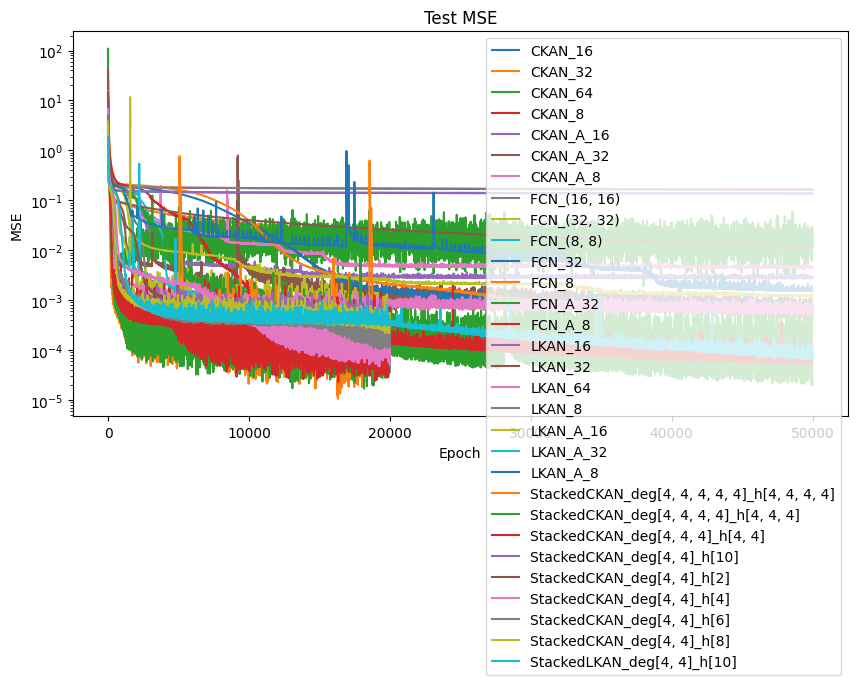

In [12]:
# Plot all models
analyser.plot_mses()
# analyser.get_late_variances()

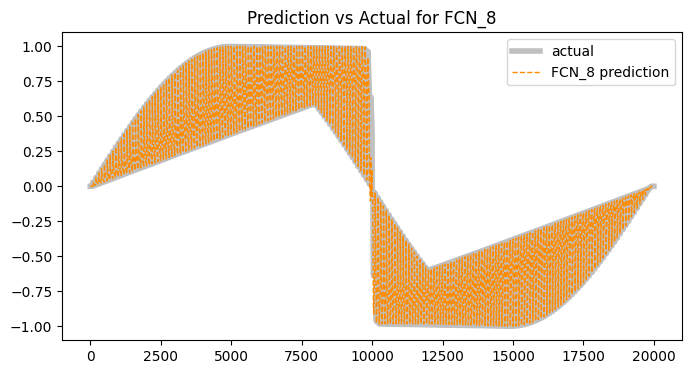

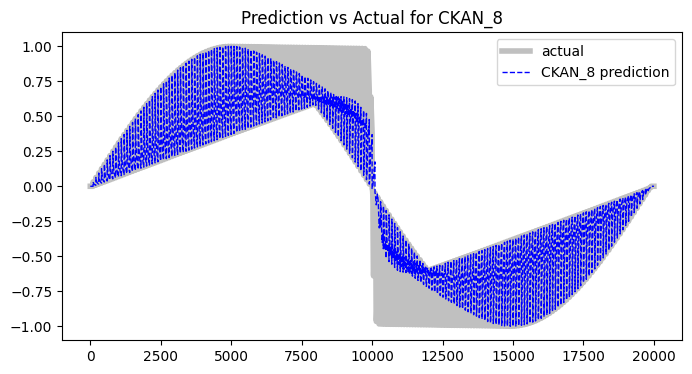

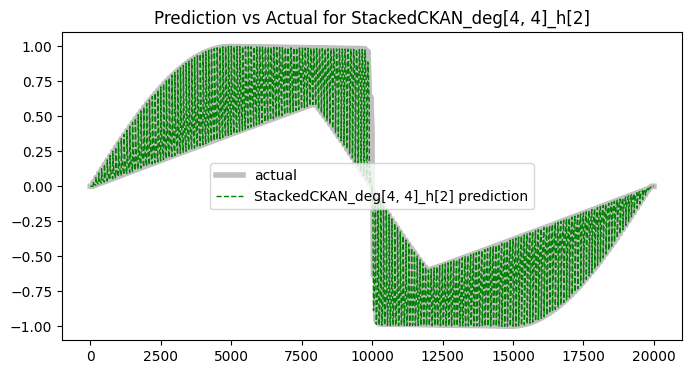

In [6]:
models = ['FCN_8', 'CKAN_8', 'StackedCKAN_deg[4, 4]_h[2]']
colors = ['darkorange', 'blue', 'green', 'blue']
analyser.plot_prediction_over_actual_1D(models, colors=colors, epoch=20000, figsize=(8, 4), exact_color='silver')

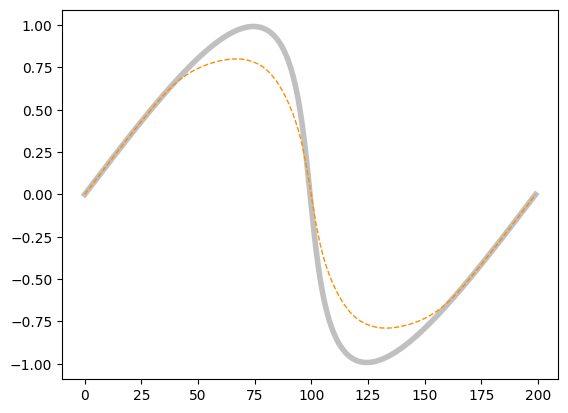

In [12]:
pred_file = f'test_50000.npy'
exact_file = 'test_exact.npy'

pred = np.load(os.path.join(test_path, 'CKAN_8', pred_file))
exact = np.load(os.path.join(test_path, 'CKAN_8', exact_file))
plt.plot(exact.reshape(200, 100, 1)[:, 25, :], label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred.reshape(200, 100, 1)[:, 25, :], label=f'CKAN_8 prediction', linestyle='--', color='darkorange', linewidth=1)

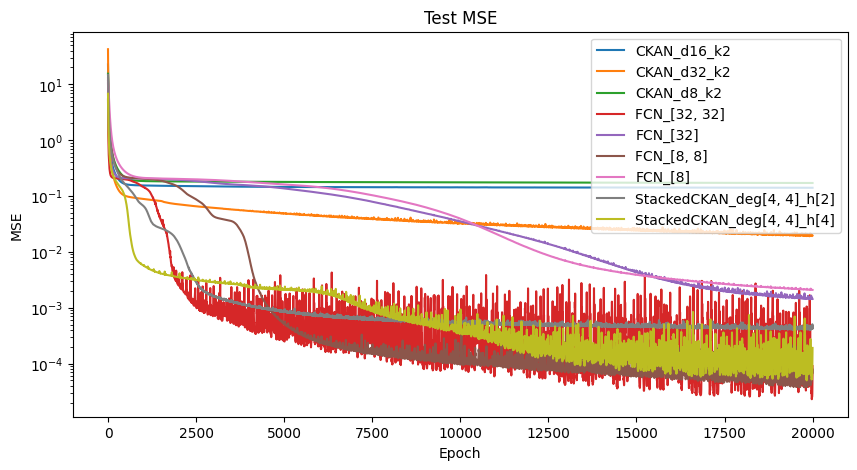

In [30]:
analyser.plot_mses(filter=f)

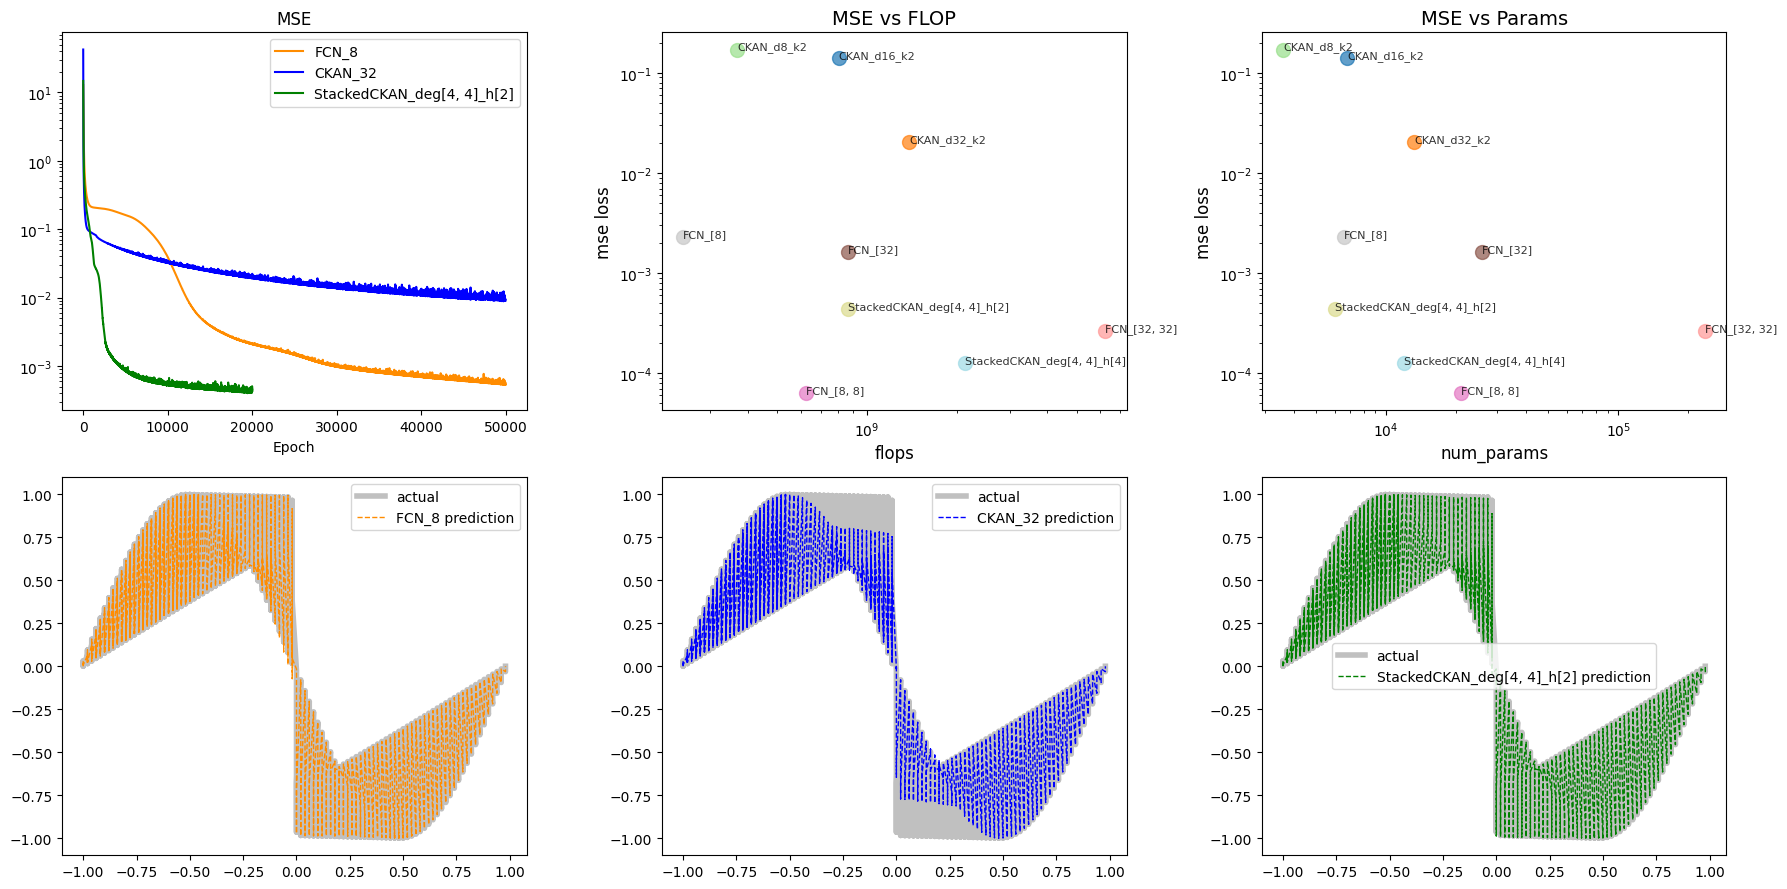

In [39]:
f = lambda x: x in [
    'CKAN_d8_k2',
    'CKAN_d16_k2',
    'CKAN_d32_k2',
    'StackedCKAN_deg[4, 4]_h[2]',
    'StackedCKAN_deg[4, 4]_h[4]',
    'FCN_[8]',
    'FCN_[32]',
    'FCN_[8, 8]',
    'FCN_[32, 32]',
]


plt.figure(figsize=(18, 9))

plt.subplot(2,3,1)
plt.semilogy(analyser.mses['FCN_8'], label='FCN_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_32'], label='CKAN_32', color='blue')
plt.semilogy(analyser.mses['StackedCKAN_deg[4, 4]_h[2]'], label='StackedCKAN_deg[4, 4]_h[2]', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2,3,2)
analyser.plot_mse_over_flops(filter=f, noshow=True, legend=False)

plt.subplot(2,3,3)
analyser.plot_mse_over_params(filter=f, noshow=True, legend=False)

pred_file = f'test_50000.npy'
exact_file = 'test_exact.npy'
xs = np.concatenate(np.array([np.ones(200)*i for i in range(100)]), axis=0)/50 - 1
plt.subplot(2,3,4)
pred = np.load(os.path.join(test_path, 'FCN_8', pred_file))
exact = np.load(os.path.join(test_path, 'FCN_8', exact_file))
plt.plot(xs, exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(xs, pred, label=f'FCN_8 prediction', linestyle='--', color='darkorange', linewidth=1)
plt.legend()

plt.subplot(2,3,5)
pred = np.load(os.path.join(test_path, 'CKAN_32', pred_file))
exact = np.load(os.path.join(test_path, 'CKAN_32', exact_file))
plt.plot(xs, exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(xs, pred, label=f'CKAN_32 prediction', linestyle='--', color='blue', linewidth=1)
plt.legend()

plt.subplot(2,3,6)
pred = np.load(os.path.join(test_path, 'StackedCKAN_deg[4, 4]_h[2]', 'test_20000.npy'))
exact = np.load(os.path.join(test_path, 'StackedCKAN_deg[4, 4]_h[2]', exact_file))
plt.plot(xs, exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(xs, pred, label=f'StackedCKAN_deg[4, 4]_h[2] prediction', linestyle='--', color='green', linewidth=1)
plt.legend()

plt.tight_layout()
plt.show()